<h2><center> <span style = "font-family: Babas; font-size: 2em;"> E-commerce Text Classification </span> </center></h2>
<h4><center> <span style = "font-family: Babas; font-size: 2em;"> Part 1. EDA and Text Normalization </span> </center></h4>
<h4><center> <span style = "font-family: Babas; font-size: 2em;"> Sugata Ghosh </span> </center></h4>

---

### Overview

The objective of the project is to classify [**e-commerce**](https://en.wikipedia.org/wiki/E-commerce) products into four categories, based on its description available in the e-commerce platforms. The categories are: `Electronics`, `Household`, `Books`, and `Clothing & Accessories`. We carried out the following steps in this notebook:

- Performed basic [**exploratory data analysis**](https://en.wikipedia.org/wiki/Exploratory_data_analysis), comparing the distributions of the number of characters, number of words, and average word-length of descriptions of products from different categories

- Employed several [**text normalization**](https://en.wikipedia.org/wiki/Text_normalization) techniques, namely *convertion to lowercase*, *removal of whitespaces*, *removal of punctuations*, *removal of unicode characters*, *substitution of acronyms*, *substitution of contractions*, *removal of stop words*, *stemming and lemmatization*, *discardment of non-alphabetic words*, *retainment of relevant parts of speech*, *removal of additional stop words*

- Combined the processes in an appropriate order into a single function that takes a text as input and outputs a normalized version of that text

- Implemented text normalization on product descriptions in the given dataset

---

### Contents

- **Introduction**
    - E-commerce Product Categorization
    - Text Classification
    - Data
    - Project Objective
- **Exploratory Data Analysis**
    - Class Frequencies
    - Number of Characters
    - Number of Words
    - Average Word-length
- **Text Normalization**
    - Convertion to Lowercase
    - Removal of Whitespaces
    - Removal of Punctuations
    - Removal of Unicode Characters
    - Substitution of Acronyms
    - Substitution of Contractions
    - Removal of Stop Words
    - Spelling Correction
    - Stemming and Lemmatization
    - Discardment of Non-alphabetic Words
    - Retainment of Relevant Parts of Speech
    - Removal of Additional Stop Words
- **Integration of the Processes**
- **Implementation on Product Description**
- **Acknowledgements**
- **References**

### Importing libraries

In [1]:
# File system manangement
import time, psutil, os

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# Others
import json

### Runtime and memory usage

In [2]:
# Recording the starting time, complemented with a stopping time check in the end to compute process runtime
start = time.time()

# Class representing the OS process and having memory_info() method to compute process memory usage
process = psutil.Process(os.getpid())

# Introduction

- **E-commerce Product Categorization**
- **Text Classification**
- **Data**
- **Project Objective**

## E-commerce Product Categorization

**E-commerce** (electronic commerce) is the activity of electronically buying or selling of products on online services or over the [**Internet**](https://en.wikipedia.org/wiki/Internet). It frequently uses the [**web**](https://en.wikipedia.org/wiki/World_Wide_Web), if not entirely, for at least some of the life cycle of a transaction, while it may also use other technologies like [**e-mail**](https://en.wikipedia.org/wiki/Email). Typical e-commerce transactions include the purchase of products (like books from Amazon) or services (such as music downloads in the form of digital distribution such as the iTunes Store). [**Online retail**](https://en.wikipedia.org/wiki/Online_shopping), [**electronic markets**](https://en.wikipedia.org/wiki/Electronic_markets), and [**online auctions**](https://en.wikipedia.org/wiki/Online_auction) are the three areas of e-commerce. E-commerce is supported by [**electronic business**](https://en.wikipedia.org/wiki/Electronic_business). The purpose of e-commerce is to enable customers to shop and pay online over the Internet, saving both time and space for consumers and businesses while also significantly improving transaction efficiency.

**Product categorization** or [**product classification**](https://en.wikipedia.org/wiki/Product_classification) is a type of [**economic taxonomy**](https://en.wikipedia.org/wiki/Economic_taxonomy) that refers to a system of categories into which a collection of products would fall under. Product categorization involves two separate tasks:

- Create, support, and expand the catalogue structure for the offered products

- Tagging products with the correct categories and attributes

While machine learning does not have much potential for use in the first task, it is possible to automate the second task, which is relatively laborious and time-consuming. **The problem considered in this notebook involves the categorization of products offered on e-commerce platforms based on the descriptions of the products mentioned therein.** The purpose of such categorization is to enhance the user experience and achieve better results with external search engines. Visitors can quickly find the products they need by navigating the catalogue or using the website's search engine.

## Text Classification

**Text classification** is a widely used [**natural language processing**](https://en.wikipedia.org/wiki/Natural_language_processing) task in different business problems. Given a statement or document, the task involves assigning to it an appropriate category from a pre-defined set of categories. The dataset of choice determines the set of categories. Text classification has applications in emotion classification, news classification, spam email detection, auto-tagging of customer queries etc.

In the present problem, the statements are the product descriptions and the categories are `Electronics`, `Household`, `Books` and `Clothing & Accessories`.

## Data

**Original source:** **https://doi.org/10.5281/zenodo.3355823**

**Kaggle dataset:** **https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification**

The dataset has been scraped from Indian e-commerce platform(s). It contains e-commerce text data for four categories: `Electronics`, `Household`, `Books` and `Clothing & Accessories`. Roughly speaking, these four categories cover $80\%$ of any e-commerce website, by and large. The dataset is in *.csv* format and consists of two columns. The first column gives the target class name and the second column gives the datapoint, which is the description of the product from the e-commerce website. We insert column names and swap the columns, to put the target column at the right.

In [3]:
# Loading and customizing the data
data = pd.read_csv(
    'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/Dataset/ecommerceDataset.csv', 
    names = ['label', 'description']
)
data = data[['description', 'label']]

print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)), 
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data

Memory usage        0.77 MB
Dataset shape    (50425, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,Household
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",Household
2,SAF 'UV Textured Modern Art Print Framed' Pain...,Household
3,"SAF Flower Print Framed Painting (Synthetic, 1...",Household
4,Incredible Gifts India Wooden Happy Birthday U...,Household
...,...,...
50420,Strontium MicroSD Class 10 8GB Memory Card (Bl...,Electronics
50421,CrossBeats Wave Waterproof Bluetooth Wireless ...,Electronics
50422,Karbonn Titanium Wind W4 (White) Karbonn Titan...,Electronics
50423,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",Electronics


In [4]:
# Example description
data['description'].iloc[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [5]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(data) - len(data.dropna()),
                 "Number of duplicate observations": data.duplicated().sum()}).to_string())

Number of observations with missing values        1
Number of duplicate observations              22622


In [6]:
data.dropna(inplace = True) # Dropping observations with missing values
data.drop_duplicates(inplace = True) # Dropping duplicate observations
data.reset_index(drop = True, inplace = True) # Resetting index

In [7]:
# Manual encoding of labels
label_dict = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}
data.replace({'label': label_dict}, inplace = True)

print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data

Memory usage        0.42 MB
Dataset shape    (27802, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",1
4,Incredible Gifts India Wooden Happy Birthday U...,1
...,...,...
27797,Micromax Bharat 5 Plus Zero impact on visual d...,0
27798,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0
27799,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0
27800,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0


## Project Objective

The objective of the project is to classify a product into the four categories `Electronics`, `Household`, `Books` and `Clothing & Accessories`, based on its description available in the e-commerce platform.

# Exploratory Data Analysis

- **Class Frequencies**
- **Number of Characters**
- **Number of Words**
- **Average Word-length**

We split the dataset based on the target classes, in order to see how different textual attributes vary across classes.

In [8]:
# Splitting the dataset by label
data_e = data[data['label'] == 0] # Electronics
data_h = data[data['label'] == 1] # Household
data_b = data[data['label'] == 2] # Books
data_c = data[data['label'] == 3] # Clothing & Accessories

## Class Frequencies

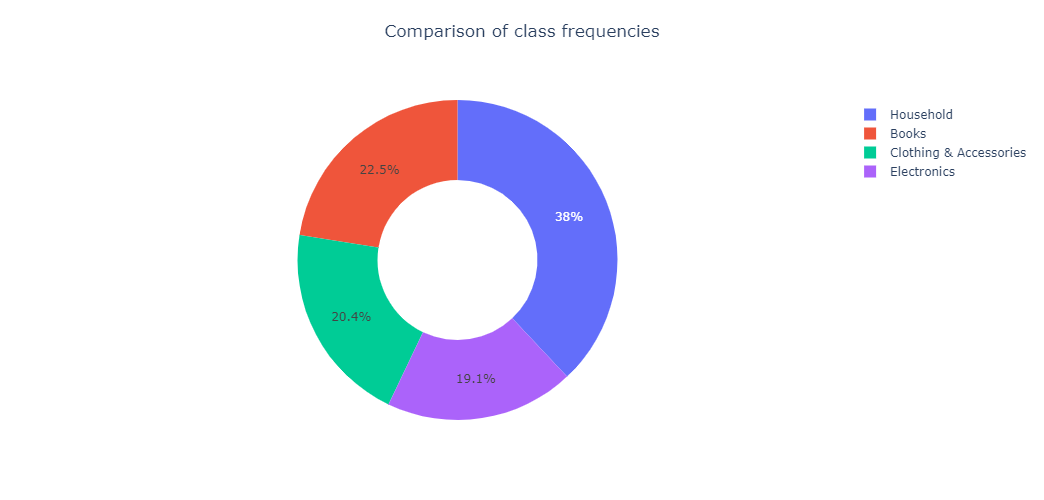

In [9]:
# Visualization of class frequencies
values = np.array([len(data_e), len(data_h), len(data_b), len(data_c)])
labels = ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of class frequencies"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

## Number of Characters

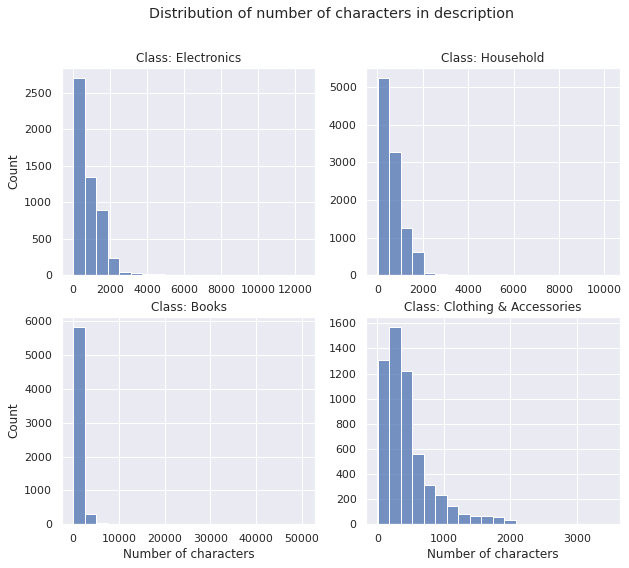

In [10]:
# Distribution of number of characters in description
data_e_char = data_e['description'].str.len()
data_h_char = data_h['description'].str.len()
data_b_char = data_b['description'].str.len()
data_c_char = data_c['description'].str.len()

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_char, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_char, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_char, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_char, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of number of characters in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of characters")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

## Number of Words

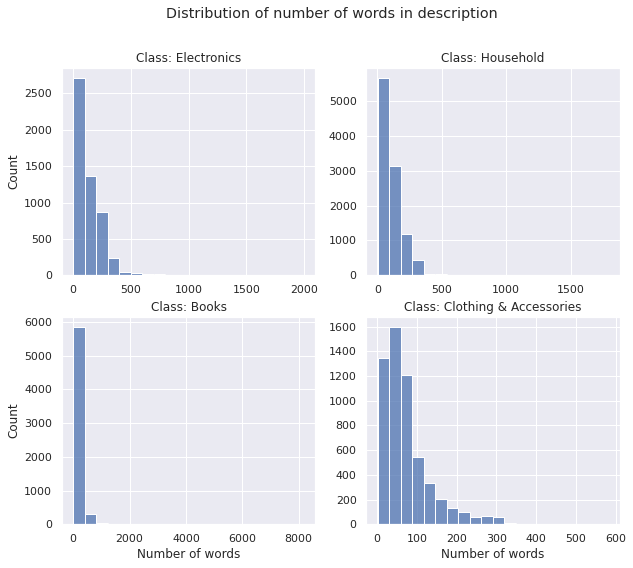

In [11]:
# Distribution of number of words in description
data_e_word = data_e['description'].str.split().map(lambda x: len(x))
data_h_word = data_h['description'].str.split().map(lambda x: len(x))
data_b_word = data_b['description'].str.split().map(lambda x: len(x))
data_c_word = data_c['description'].str.split().map(lambda x: len(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_word, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_word, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_word, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_word, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of number of words in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of words")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

## Average Word-length

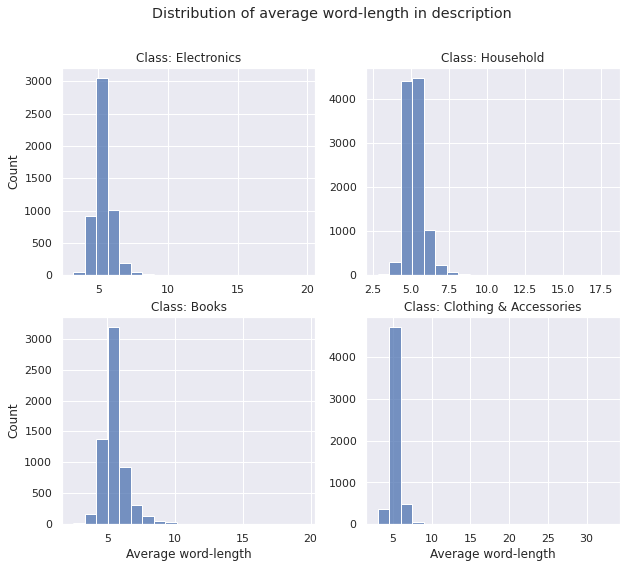

In [12]:
# Distribution of average word-length in description
data_e_avg = data_e['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_h_avg = data_h['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_b_avg = data_b['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_c_avg = data_c['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_avg, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_avg, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_avg, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_avg, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of average word-length in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Average word-length")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

# Text Normalization

- **Convertion to Lowercase**
- **Removal of Whitespaces**
- **Removal of Punctuations**
- **Removal of Unicode Characters**
- **Substitution of Acronyms**
- **Substitution of Contractions**
- **Removal of Stop Words**
- **Spelling Correction**
- **Stemming and Lemmatization**
- **Discardment of Non-alphabetic Words**
- **Retainment of Relevant Parts of Speech**
- **Removal of Additional Stop Words**
- **Integration of the Processes**
- **Implementation on Product Description**

In natural language processing, **text normalization** is the process of transforming text into a single canonical form. We consider a number of text normalization processes. At the end of the section, we combine selected processes into one single function and apply it on the product descriptions.

In [13]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

## Convertion to Lowercase

We convert all alphabetical characters of the tweets to lowercase so that the models do not differentiate identical words due to case-sensitivity. For example, without the normalization, *Sun* and *sun* would have been treated as two different words, which is not useful in the present context.

In [14]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a FUNCTION that CoNvErTs a Text to lowercase
Output: this is a function that converts a text to lowercase


## Removal of Whitespaces

We remove the unnecessary empty spaces from the description of the observations.

In [15]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


## Removal of Punctuations

Mostly the punctuations do not play any role in predicting whether a particular tweet indicate disaster or not. Thus we prevent them from contaminating the classification procedures by removing them from the tweets. However, we keep **apostrophe** since most of the contractions contain this punctuation and will be automatically taken care of once we convert the contractions.

In [16]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input: Here's [an] example? {of} &a string. with.? punctuations!!!!
Output: Here's an example of a string with punctuations


## Removal of Unicode Characters

The training tweets are typically sprinkled with emojis, URLs, punctuation and other symbols that do not contribute meaningfully to our analysis, but instead create noise in the learning procedure. Some of these symbols are unique, while the rest usually translate into unicode strings. We remove these irrelevant characters from the data using the regular expression module.

In [17]:
# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

text = '<a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>'
print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input: <a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>
Output:  Ecommerce Text Classification 


In [18]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: This innovative hd printing technique results in durable and spectacular looking prints 😊
Output: This innovative hd printing technique results in durable and spectacular looking prints 


In [19]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))

Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output: It's a function that removes links starting with http: or https such as 


## Substitution of Acronyms

[**Acronyms**](https://en.wikipedia.org/wiki/Acronym) are shortened forms of phrases, generally found in informal writings. For instance, *for your information* is written as *fyi* and *by the way* is written as *btw*. These time and effort-saving acronyms have received almost universal acceptance in recent times. For the sake of proper modeling, we convert the acronyms, appearing in the tweets, back to their respective original forms.

In [20]:
# Dictionary of acronyms
acronyms_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')

print("Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict['fyi']))

Example: Original form of the acronym 'fyi' is 'for your information'


In [21]:
# Dataframe of acronyms
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth


In [22]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [23]:
# Function to convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

text = "btw you've to fill in the details including dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))

Input: btw you've to fill in the details including dob
Output: by the way you've to fill in the details including date of birth


## Substitution of Contractions

A [**contraction**](https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions) is a shortened form of a word or a phrase, obtained by dropping one or more letters.

These are commonly used in everyday speech, written dialogue, informal writing and in situations where space is limited or costly, such as advertisements. Usually the missing letters are indicated by an apostrophe, but there are exceptions. Examples: **I'm = I am**, **let's = let us**, **won't = would not**, **howdy = how do you do**.

We have compiled an extensive list of English contractions, which can be found in the attached .json file titled *english_contractions*. The list is largely based on information obtained from [**this wikipedia page**](https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions) on *list of English contractions*. Note that the file only considers contractions in lowercase, i.e. it assumes that the textual data have already been transformed to lowercase before substituting the contractions. For example, the process will convert **i'll** to **i shall** but will leave **I'll** unchanged.

In [24]:
# Dictionary of contractions
contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')

print("Example: Original form of the contraction 'aren't' is '{}'".format(contractions_dict["aren't"]))

Example: Original form of the contraction 'aren't' is 'are not'


In [25]:
# Dataframe of contractions
pd.DataFrame(contractions_dict.items(), columns = ['contraction', 'original']).head()

,contraction,original
0,'aight,alright
1,ain't,are not
2,amn't,am not
3,arencha,are not you
4,aren't,are not


The contractions do not always have a one-to-one mapping with the original words. For example **i'd** can come from both **i had** and **i would**. In the .json file only one the original words/phrases are chosen. However, this does not affect our analysis since words like **had** and **would**, which do not have any meaningful contribution in achieving the objective of the project, will be discarded in the next subsection.

In [26]:
# List of contractions
contractions_list = list(contractions_dict.keys())

In [27]:
# Function to convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

text = "he's doin' fine"
print("Input: {}".format(text))
print("Output: {}".format(convert_contractions(text)))

Input: he's doin' fine
Output: he is doing fine


## Removal of Stop Words

Several words, primarily pronouns, prepositions, modal verbs etc, are identified not to have much effect on the classification procedure. These are called [**stop words**](https://en.wikipedia.org/wiki/Stop_word). To get rid of the unwanted contamination effect, we remove these words.

In [28]:
# Stopwords
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "This is a function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: This is a function that removes stopwords in a given text
Output: This function removes stopwords given text


## Spelling Correction

The classification procedure cannot take mispellings into consideration and treats a word and its misspelt version as separate words. For this reason it is necessary to conduct spelling correction before feeding the data to the classification procedure.

In [30]:
# pyspellchecker
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "I'm goinng therre"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: I'm goinng therre
Output: I'm going there


## Stemming and Lemmatization

[**Stemming**](https://en.wikipedia.org/wiki/Stemming) is the process of reducing the words to their root form or **stem**. It reduces related words to the same *stem* even if the stem is not a dictionary word. For example, the words **introducing**, **introduced**, **introduction** reduce to a common word **introduce**. However, the process often produces stems that are not actual words.

In [31]:
# Stemming
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


The stems **introduc**, **lemmat** and **improv** are not actual words. [**Lemmatization**](https://en.wikipedia.org/wiki/Lemmatisation) offers a more sophisticated approach by utilizing a corpus to match root forms of the words. Unlike stemming, it uses the context in which a word is being used.

In [32]:
# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


## Discardment of Non-alphabetic Words

The non-alphabetic words are not numerous and create unnecessary diversions in the context of classifying tweets into non-disaster and disaster categories. Hence we discard these words.

In [33]:
# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

text = "It is an ocean of thousands and 1000s of crowd"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is an ocean of thousands and 1000s of crowd
Output: It is an ocean of thousands and of crowd


## Retainment of Relevant Parts of Speech

The [**parts of speech**](https://en.wikipedia.org/wiki/Part_of_speech) provide a great tool to select a subset of words that are more likely to contribute in the classification procedure and discard the rest to avoid noise. The idea is to select a number of parts of speech that are important to the context of the problem. Then we partition the words in a given text into several subsets corresponding to each part of speech and keep only those subsets corresponding to the selected parts of speech. 

In [34]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

text = "He arrived at seven o'clock on Wednesday evening"
print("Input: {}".format(text))
tokens = regexp.tokenize(text)
print("Tokens: {}".format(tokens))
tokens_tagged = nltk.pos_tag(tokens)
print("Tagged Tokens: {}".format(tokens_tagged))
print("Output: {}".format(keep_pos(text)))

Input: He arrived at seven o'clock on Wednesday evening
Tokens: ['He', 'arrived', 'at', 'seven', "o'clock", 'on', 'Wednesday', 'evening']
Tagged Tokens: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
Output: He arrived o'clock Wednesday evening


For an extensive list of part-of-speech tags, see the [**alphabetical list of part-of-speech tags used in the Penn Treebank Project**](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

## Removal of Additional Stop Words

Analyzing the data, we observe that several unnecessary words, which are not included in the ready-made set of **stop words**, keep appearing in the text corpus. We discard these words to remove noise in the classification procedure.

In [35]:
# Additional stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

# Integration of the Processes

We integrate the text normalization processes in appropriate order. We have kept the **spelling correction** step commented out as it takes a massive amount of time to run on large datasets.

In [36]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
#     text = pyspellchecker(text)
    text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text

text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization
Output: combine function function apply product description


# Implementation on Product Description

In [37]:
%%time
# Implementing text normalization
data_normalized = pd.DataFrame()
data_normalized['normalized description'] = data['description'].apply(text_normalizer)
data_normalized['label'] = data['label']
data_normalized

CPU times: user 7min 21s, sys: 2 s, total: 7min 23s
Wall time: 7min 24s


,normalized description,label
0,paper plane design frame wall hang office deco...,1
1,framed paint wood inch inch effect print textu...,1
2,saf texture art print frame paint cm cm cm set...,1
3,saf flower print frame paint inch inch texture...,1
4,gift india wooden birthday personalize gift in...,1
...,...,...
27797,micromax bharat impact displayscratch proof pr...,0
27798,lumia gb lumia experience power window price h...,0
27799,lumia gb colourblack product description defin...,0
27800,karbonn titanium titanium wind performance pow...,0


In [38]:
# Saving the dataframe
data_normalized.to_csv('ecommerceDataset_normalized.csv', index = False)

# Acknowledgements

- [**Ecommerce Text Classification**](https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification) dataset
- [**Gautam. (2019). E commerce text dataset (version - 2) [Data set]. *Zenodo*.**](https://doi.org/10.5281/zenodo.3355823)
- [**Machine Learning in eCommerce Product Categorization**](https://virtocommerce.com/blog/ecommerce-product-categorization) by **Nikolay Sidelnikov**

# References

- [**Acronym**](https://en.wikipedia.org/wiki/Acronym)
- [**Alphabetical list of part-of-speech tags used in the Penn Treebank Project**](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)
- [**E-commerce**](https://en.wikipedia.org/wiki/E-commerce)
- [**e-mail**](https://en.wikipedia.org/wiki/Email)
- [**Economic taxonomy**](https://en.wikipedia.org/wiki/Economic_taxonomy)
- [**Electronic business**](https://en.wikipedia.org/wiki/Electronic_business)
- [**Electronic markets**](https://en.wikipedia.org/wiki/Electronic_markets)
- [**Exploratory data analysis**](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
- [**Internet**](https://en.wikipedia.org/wiki/Internet)
- [**List of English contractions**](https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions)
- [**Lemmatization**](https://en.wikipedia.org/wiki/Lemmatisation)
- [**Natural language processing**](https://en.wikipedia.org/wiki/Natural_language_processing)
- [**Online auction**](https://en.wikipedia.org/wiki/Online_auction)
- [**Online shopping**](https://en.wikipedia.org/wiki/Online_shopping)
- [**Part of speech**](https://en.wikipedia.org/wiki/Part_of_speech)
- [**Product classification**](https://en.wikipedia.org/wiki/Product_classification)
- [**Sparse matrix**](https://en.wikipedia.org/wiki/Sparse_matrix)
- [**Stemming**](https://en.wikipedia.org/wiki/Stemming)
- [**Stop word**](https://en.wikipedia.org/wiki/Stop_word)
- [**Text corpus**](https://en.wikipedia.org/wiki/Text_corpus)
- [**Text normalization**](https://en.wikipedia.org/wiki/Text_normalization)
- [**World Wide Web**](https://en.wikipedia.org/wiki/World_Wide_Web)

In [39]:
# Runtime and memory usage
stop = time.time()
print(pd.Series({"Process runtime": "{:.2f} seconds".format(float(stop - start)),
                 "Process memory usage": "{:.2f} MB".format(float(process.memory_info()[0]/(1024*1024)))}).to_string())

Process runtime         452.84 seconds
Process memory usage        1007.00 MB
